In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
X_feature_names= ['age', 'gender', 'body_mass_index', 'average_blood_pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

In [11]:
np.min(y), np.max(y)

(25.0, 346.0)

In [12]:
#bin target variable for better sampling
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10, stratify=binned_y)

In [13]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
binned_y

array([4, 2, 3, 5, 3, 2, 3, 2, 3, 7, 3, 2, 4, 4, 3, 4, 4, 3, 2, 4, 2, 1,
       2, 5, 4, 5, 3, 2, 3, 6, 3, 2, 7, 2, 2, 3, 6, 6, 6, 2, 3, 2, 2, 2,
       6, 2, 4, 3, 2, 3, 4, 5, 2, 3, 4, 3, 2, 1, 4, 4, 2, 3, 2, 3, 2, 4,
       4, 2, 4, 4, 1, 6, 5, 3, 2, 1, 4, 5, 6, 3, 3, 2, 2, 5, 2, 3, 2, 3,
       1, 3, 2, 4, 1, 2, 2, 4, 4, 6, 2, 2, 3, 3, 7, 4, 2, 2, 3, 3, 5, 2,
       3, 2, 5, 6, 6, 5, 6, 6, 4, 5, 5, 4, 4, 2, 3, 4, 2, 3, 3, 6, 6, 4,
       3, 2, 3, 6, 2, 6, 7, 6, 3, 7, 5, 2, 4, 6, 4, 3, 2, 3, 6, 2, 6, 2,
       4, 4, 1, 2, 2, 4, 2, 5, 4, 3, 5, 2, 2, 5, 6, 4, 1, 2, 6, 3, 4, 3,
       5, 5, 2, 4, 3, 2, 3, 4, 6, 3, 3, 3, 3, 2, 6, 4, 2, 3, 2, 3, 2, 3,
       3, 2, 4, 1, 4, 5, 6, 2, 4, 5, 4, 2, 4, 2, 2, 1, 2, 6, 5, 6, 5, 4,
       2, 2, 6, 4, 2, 5, 2, 3, 4, 2, 5, 4, 6, 2, 5, 3, 2, 2, 6, 6, 6, 4,
       2, 1, 4, 3, 2, 2, 6, 5, 7, 5, 2, 4, 7, 4, 7, 2, 2, 2, 1, 3, 7, 3,
       3, 2, 1, 3, 6, 2, 5, 3, 4, 5, 2, 2, 6, 2, 3, 5, 6, 2, 5, 4, 4, 5,
       2, 5, 2, 2, 7, 5, 2, 5, 2, 2, 2, 1, 3, 2, 6,

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rft = RandomForestRegressor()
rft.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred = rft.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print(r2_score(y_test, y_pred))
print( mean_absolute_error(y_test, y_pred))


50.31797752808989


In [20]:
rft.feature_importances_

array([0.05807703, 0.01122691, 0.26807742, 0.0944001 , 0.03702187,
       0.0509997 , 0.05993179, 0.01735127, 0.33859181, 0.0643221 ])

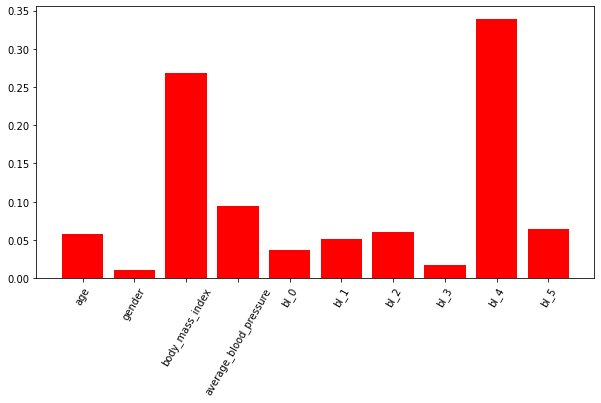

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(10), rft.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(10))
ax.set_xticklabels(X_feature_names, rotation=60)
plt.show()

In [22]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [25]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=1, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 99,
 'bootstrap': True}

In [33]:
reg = rf_random.best_estimator_

In [31]:
# Manually provide the best parameters to model for training
rf_reg = RandomForestRegressor(**{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 55,
 'bootstrap': True})

In [34]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=99, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
#rf_reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_hat))

60.38012376838191

In [39]:
mean_absolute_error(y_test, y_hat)

50.12002235103478

In [ ]:
# Or directly use best estimator to train the model
rf_model = rf_random.best_estimator_

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 80, 90, 100],
    'max_features': [0.3, 0.5, 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [ 2, 4, 5, 8],
    'n_estimators': [200]
}

In [ ]:
# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid.fit(X_train, y_train)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
mean_absolute_error(y_test, y_pred)

In [5]:
xx = [2, 4, 8, 13 ,35, 7, 42, 25, 15, 12, 46]

In [6]:
bins = [2, 10, 25, 40, 50]

In [9]:
binned_XX = np.digitize(xx, bins, right = True)

In [10]:
binned_XX

array([0, 1, 1, 2, 3, 1, 4, 2, 2, 2, 4], dtype=int64)